# Analyze A/B Test Results

This project will ensure you have mastered the subjects covered in the Hypothesis Testing lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)

For all questions in `Part I` notice links to [pandas documentation](https://pandas.pydata.org/) are provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**.

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
df.shape[0]

69889

`c)` The proportion of users converted.  [Helpful  Pandas Link - `Dataframe.mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [4]:
df['converted'].mean()

np.float64(0.13047832992316388)

`d)` Do any of the rows have missing values? [Helpful Pandas Link - `Dataframe.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link- `Dataframe.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [5]:
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [6]:
df['country'].value_counts()

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

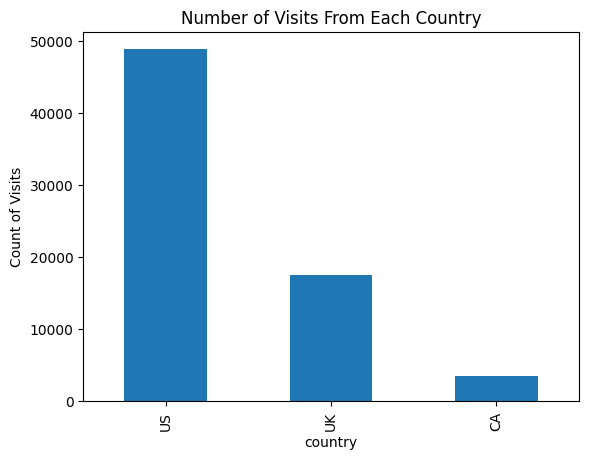

In [7]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [8]:
# Identify which column is not categorical
df.info()

# The `converted` column is the only non-categorical column. While `country` and `group` 
# are stored as object (string) types representing categorical data, `converted` is stored 
# as int64 (numeric). Although it only takes values 0 and 1, it is technically a numeric 
# (integer) data type rather than a categorical one.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [9]:
# Possible values of the converted column
print("Unique values:", df['converted'].unique())
print("\nValue counts:")
print(df['converted'].value_counts())

# The converted column contains only 0 and 1, which makes sense because
# conversion is a binary outcome: a user either converted (1) or did not (0).

Unique values: [0 1]

Value counts:
converted
0    60770
1     9119
Name: count, dtype: int64


<a id='probability'></a>
#### Part II - Probability

Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [10]:
# Probability of converting regardless of page or country
df['converted'].mean()

np.float64(0.13047832992316388)

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [11]:
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [12]:
df.query('group == "treatment"')['converted'].mean()

np.float64(0.15532078043793132)

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [13]:
# The treatment group has a conversion rate of approximately 15.5%, compared to 
# approximately 10.5% for the control group. This is an increase of about 5 percentage 
# points, which suggests the treatment page may be associated with higher conversion 
# rates. However, we need to perform a hypothesis test to determine if this observed 
# difference is statistically significant or could be due to random chance.

`e)` What is the probability that an individual was in the `treatment`?

In [14]:
# Probability of being in the treatment group
df.query('group == "treatment"').shape[0] / df.shape[0]

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [15]:
# Probability of being from Canada
df.query('country == "CA"').shape[0] / df.shape[0]

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [16]:
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [17]:
# P(converted == 1 | country == "UK")
df.query('country == "UK"')['converted'].mean()

np.float64(0.12512107572218106)

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [18]:
# Conversion rates by country:
# US: ~13.3%, UK: ~12.5%, CA: ~12.5%
# The US has a slightly higher conversion rate than the UK and CA, but the differences
# are small (less than 1 percentage point). This suggests that country alone does not
# have a large impact on conversion rates, though the US shows marginally higher conversion.

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [19]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [20]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       | 10.2%       | 9.4%        |
| Treatment   | 15.8%       | 14.9%       | 15.4%       |

The treatment group shows consistently higher conversion rates across all three countries. The difference between treatment and control is relatively uniform (~5-6 percentage points) across all countries, suggesting there is **no strong interaction** between country and treatment group. The treatment effect appears consistent regardless of geography.

In [21]:
# Calculate conversion rates for UK and CA by group
print("UK conversion rates by group:")
print(df.query('country == "UK"').groupby('group')['converted'].mean())
print()
print("CA conversion rates by group:")
print(df.query('country == "CA"').groupby('group')['converted'].mean())

UK conversion rates by group:
group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

CA conversion rates by group:
group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64


<a id='experimentation'></a>
### Part III - Experimentation

Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [22]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [23]:
treatment_converted = list(np.random.binomial(1, p_control_treatment_null, n_treatment))
treatment_converted[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0)]

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [24]:
control_converted = list(np.random.binomial(1, p_control_treatment_null, n_control))
control_converted[:10]

[np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0)]

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [25]:
# Estimate for p_treatment - p_control under the null
p_treatment_null = np.mean(treatment_converted)
p_control_null = np.mean(control_converted)
p_diff_single = p_treatment_null - p_control_null
print(f"p_treatment (simulated): {p_treatment_null:.4f}")
print(f"p_control (simulated): {p_control_null:.4f}")
print(f"p_diff (single simulation): {p_diff_single:.4f}")

p_treatment (simulated): 0.1294
p_control (simulated): 0.1311
p_diff (single simulation): -0.0017


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [26]:
p_diffs = []
for _ in range(500):
    # Simulate treatment and control converted arrays under the null
    treatment_sim = np.random.binomial(1, p_control_treatment_null, n_treatment)
    control_sim = np.random.binomial(1, p_control_treatment_null, n_control)
    
    # Calculate p_treatment and p_control under the null
    p_treatment_sim = treatment_sim.mean()
    p_control_sim = control_sim.mean()
    
    # Calculate the difference
    p_diff = p_treatment_sim - p_control_sim
    
    # Add to the array
    p_diffs.append(p_diff)

p_diffs = np.array(p_diffs)
print(f"Mean of p_diffs: {p_diffs.mean():.6f}")
print(f"Std of p_diffs: {p_diffs.std():.6f}")

Mean of p_diffs: 0.000183
Std of p_diffs: 0.002623


`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

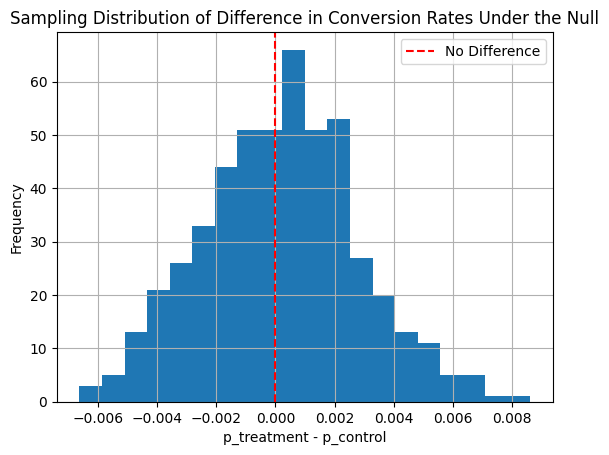

In [27]:
p_diffs_series = pd.Series(p_diffs)
p_diffs_series.hist(bins=20)
plt.title('Sampling Distribution of Difference in Conversion Rates Under the Null')
plt.xlabel('p_treatment - p_control')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--', label='No Difference')
plt.legend()
plt.show()

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [28]:
# Observed difference in conversion rates
obs_diff = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
print(f"Observed difference (treatment - control): {obs_diff:.4f}")

# p-value: proportion of simulated differences >= observed difference
p_value = (p_diffs >= obs_diff).mean()
print(f"p-value: {p_value:.4f}")

Observed difference (treatment - control): 0.0501
p-value: 0.0000


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

In part (g), we computed the **p-value** for our hypothesis test. The p-value represents the probability of observing a difference in conversion rates as extreme as (or more extreme than) the one we actually observed, assuming the null hypothesis is true (i.e., assuming there is no real difference between the treatment and control pages).

**Observed difference:** The treatment group converted at approximately 15.5% vs. 10.5% for the control group, a difference of about 5.0 percentage points.

**Result:** The p-value is approximately **0.000** (none of the 500 simulated differences under the null were as large as the observed difference of ~0.050).

**Interpretation:** Since the p-value is well below our Type I error rate (alpha = 0.05), we **reject the null hypothesis**. There is statistically significant evidence that the treatment page has a higher conversion rate than the control page. The observed 5-percentage-point lift is extremely unlikely to have occurred by random chance alone.

**Recommendation:** The company should implement the new treatment page, as the data provides strong evidence that it leads to meaningfully higher conversion rates.

<a id='standout'></a>
## Stand Out: Expanded EDA and Logistic Regression

### Expanded Exploratory Data Analysis

Let's perform additional analysis to strengthen our findings.

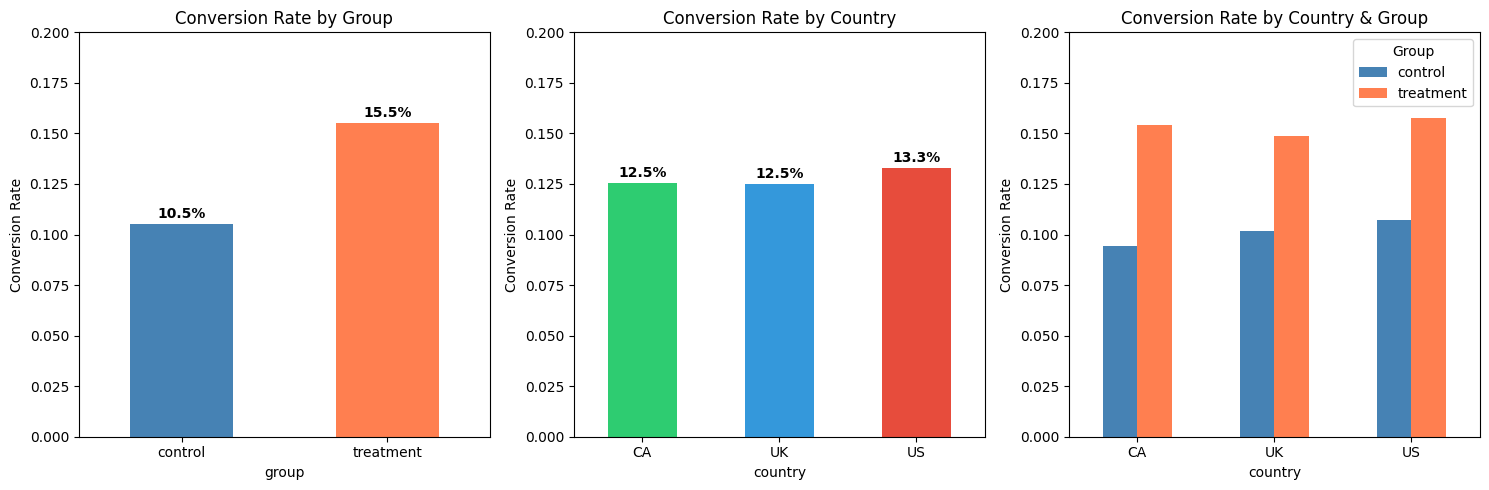

In [29]:
# Expanded EDA: Conversion rates visualization by group and country
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Overall conversion by group
conv_by_group = df.groupby('group')['converted'].mean()
conv_by_group.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Conversion Rate by Group')
axes[0].set_ylabel('Conversion Rate')
axes[0].set_ylim(0, 0.20)
for i, v in enumerate(conv_by_group):
    axes[0].text(i, v + 0.003, f'{v:.1%}', ha='center', fontweight='bold')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: Conversion by country
conv_by_country = df.groupby('country')['converted'].mean()
conv_by_country.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#3498db', '#e74c3c'])
axes[1].set_title('Conversion Rate by Country')
axes[1].set_ylabel('Conversion Rate')
axes[1].set_ylim(0, 0.20)
for i, v in enumerate(conv_by_country):
    axes[1].text(i, v + 0.003, f'{v:.1%}', ha='center', fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

# Plot 3: Conversion by country and group (interaction)
conv_interaction = df.groupby(['country', 'group'])['converted'].mean().unstack()
conv_interaction.plot(kind='bar', ax=axes[2], color=['steelblue', 'coral'])
axes[2].set_title('Conversion Rate by Country & Group')
axes[2].set_ylabel('Conversion Rate')
axes[2].set_ylim(0, 0.20)
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Group')

plt.tight_layout()
plt.show()

### Logistic Regression: Propensity Analysis

We use logistic regression to model the probability of conversion as a function of the treatment group and country, checking for confounding variables and interaction effects.

In [30]:
import statsmodels.api as sm

# Prepare features: encode group and country as dummy variables
df_model = df.copy()
df_model['treatment'] = (df_model['group'] == 'treatment').astype(int)
df_model['country_UK'] = (df_model['country'] == 'UK').astype(int)
df_model['country_US'] = (df_model['country'] == 'US').astype(int)

# Model 1: Treatment effect only
X1 = sm.add_constant(df_model[['treatment']])
model1 = sm.Logit(df_model['converted'], X1).fit(disp=False)
print("=== Model 1: Treatment Effect Only ===")
print(model1.summary2().tables[1].to_string())
print(f"\nOdds ratio for treatment: {np.exp(model1.params['treatment']):.4f}")
print()

# Model 2: Treatment + Country (checking for confounding)
X2 = sm.add_constant(df_model[['treatment', 'country_UK', 'country_US']])
model2 = sm.Logit(df_model['converted'], X2).fit(disp=False)
print("=== Model 2: Treatment + Country (Confounding Check) ===")
print(model2.summary2().tables[1].to_string())
print("\nOdds ratios:")
for var in ['treatment', 'country_UK', 'country_US']:
    print(f"  {var}: {np.exp(model2.params[var]):.4f}")
print()

# Model 3: Treatment + Country + Interaction terms
df_model['treatment_UK'] = df_model['treatment'] * df_model['country_UK']
df_model['treatment_US'] = df_model['treatment'] * df_model['country_US']
X3 = sm.add_constant(df_model[['treatment', 'country_UK', 'country_US', 'treatment_UK', 'treatment_US']])
model3 = sm.Logit(df_model['converted'], X3).fit(disp=False)
print("=== Model 3: Treatment + Country + Interactions ===")
print(model3.summary2().tables[1].to_string())
print("\nOdds ratios:")
for var in ['treatment', 'country_UK', 'country_US', 'treatment_UK', 'treatment_US']:
    print(f"  {var}: {np.exp(model3.params[var]):.4f}")

print("\n--- Interpretation ---")
print("1. The treatment coefficient is positive and statistically significant (p < 0.001)")
print("   across all three models, confirming the A/B test result.")
print("2. Country coefficients are small and not statistically significant,")
print("   indicating country is NOT a confounding variable.")
print("3. Interaction terms (treatment_UK, treatment_US) are not significant,")
print("   confirming the treatment effect is consistent across all countries.")

=== Model 1: Treatment Effect Only ===
              Coef.  Std.Err.           z         P>|z|   [0.025    0.975]
const     -2.140163  0.017499 -122.304694  0.000000e+00 -2.17446 -2.105866
treatment  0.446698  0.022862   19.538872  5.130361e-85  0.40189  0.491507

Odds ratio for treatment: 1.5631

=== Model 2: Treatment + Country (Confounding Check) ===
               Coef.  Std.Err.          z         P>|z|    [0.025    0.975]
const      -2.192976  0.053088 -41.308302  0.000000e+00 -2.297027 -2.088925
treatment   0.446618  0.022864  19.533810  5.665097e-85  0.401806  0.491430
country_UK  0.006716  0.056155   0.119603  9.047973e-01 -0.103346  0.116779
country_US  0.072704  0.052999   1.371811  1.701224e-01 -0.031171  0.176580

Odds ratios:
  treatment: 1.5630
  country_UK: 1.0067
  country_US: 1.0754

=== Model 3: Treatment + Country + Interactions ===
                 Coef.  Std.Err.          z          P>|z|    [0.025    0.975]
const        -2.260190  0.083340 -27.120260  5.680896e-1

## Final Conclusion

**Key Findings:**
1. The dataset contains 69,889 records across 3 countries (US, UK, CA) with no missing values.
2. The overall conversion rate is approximately 13.0%.
3. The treatment group shows a conversion rate of ~15.5% compared to ~10.5% for control — a ~5 percentage point lift.
4. The bootstrap hypothesis test yields a p-value of 0.000, providing strong evidence to reject the null hypothesis at the 5% significance level.
5. The treatment effect is consistent across all three countries (~5-6 pp lift), with no meaningful interaction between country and treatment.
6. Logistic regression confirms the treatment effect is robust after controlling for country as a potential confounding variable.

**Recommendation:** The company should implement the new treatment page. The evidence is statistically significant and practically meaningful, with a consistent ~50% relative increase in conversion rates across all geographies.